# Imports

In [1]:
import ray

ray.shutdown()

In [7]:
%load_ext autoreload
%autoreload 2

import datetime as dt
import numpy as np
import pandas as pd
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 99)
import pandas_bokeh
pandas_bokeh.output_file("tmp/bokeh_output.html")
# import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style
style.use('fivethirtyeight')
mpl.rcParams['figure.figsize'] = [20, 7]

# import pdb; pdb.set_trace()
# import pudb; pudb.set_trace()

# .describe(include='all', datetime_is_numeric=True)
# df.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)  # 'Blues', 'coolwarm', 'RdBu_r' & 'BrBG'
# pd.set_option('precision', 2)
# .plot_bokeh(sizing_mode="scale_height")
# .plot_bokeh(kind='hist', bins=1000, sizing_mode="scale_height", xlim=[0, .1])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Sample tick dates

In [3]:
from bar_sampler import meta, sampler, stacked


thresh = {
    # meta params
    'symbol': 'VTI',
    'start_date': '2019-01-10',
    'end_date': '2019-01-20',
    # filter
    'mad_value_winlen': 22,
    'mad_deviation_winlen': 1111,
    'mad_k': 17,
    'jma_winlen': 7,
    'jma_power': 2,
    # time batcher
    'batch_freq': '2s',
    # bar sampler params
    'renko_return': 'price_jma_return',
    'renko_size': 0.1,  # for simple runs
    'renko_reveral_multiple': 2,
    'renko_range_frac': 22,
    'renko_range_min_pct_value': 0.03,  # X% of symbol value to enforc min renko size
    'max_duration_td': dt.timedelta(minutes=33),
    'min_duration_td': dt.timedelta(seconds=33),
    'min_tick_count': 33,
    # label params
    'add_label': True,
    'reward_ratios': list(np.arange(2, 11, 0.5)),
}

In [4]:
# bd = meta.get_bar_date(thresh, date='2019-01-02')

bds = meta.get_bar_dates(thresh, ray_on=True)


2021-05-21 11:21:55,444	INFO services.py:1267 -- View the Ray dashboard at http://127.0.0.1:1111


(pid=27871) VTI 2019-01-15 trying to get data from local file...
(pid=27870) VTI 2019-01-11 trying to get data from local file...
(pid=27872) VTI 2019-01-10 trying to get data from local file...
(pid=27869) VTI 2019-01-14 trying to get data from local file...
(pid=27870) False    0.997743
(pid=27870) True     0.002257
(pid=27870) Name: mad_outlier, dtype: float64
(pid=27872) False    0.998025
(pid=27872) True     0.001975
(pid=27872) Name: mad_outlier, dtype: float64
(pid=27869) False    0.998336
(pid=27869) True     0.001664
(pid=27869) Name: mad_outlier, dtype: float64
(pid=27871) False    0.99222
(pid=27871) True     0.00778
(pid=27871) Name: mad_outlier, dtype: float64
(pid=27869) VTI 2019-01-16 trying to get data from local file...
(pid=27869) False    0.993748
(pid=27869) True     0.006252
(pid=27869) Name: mad_outlier, dtype: float64
(pid=27872) VTI 2019-01-17 trying to get data from local file...
(pid=27872) False    0.997141
(pid=27872) True     0.002859
(pid=27872) Name: mad_

<AxesSubplot:>

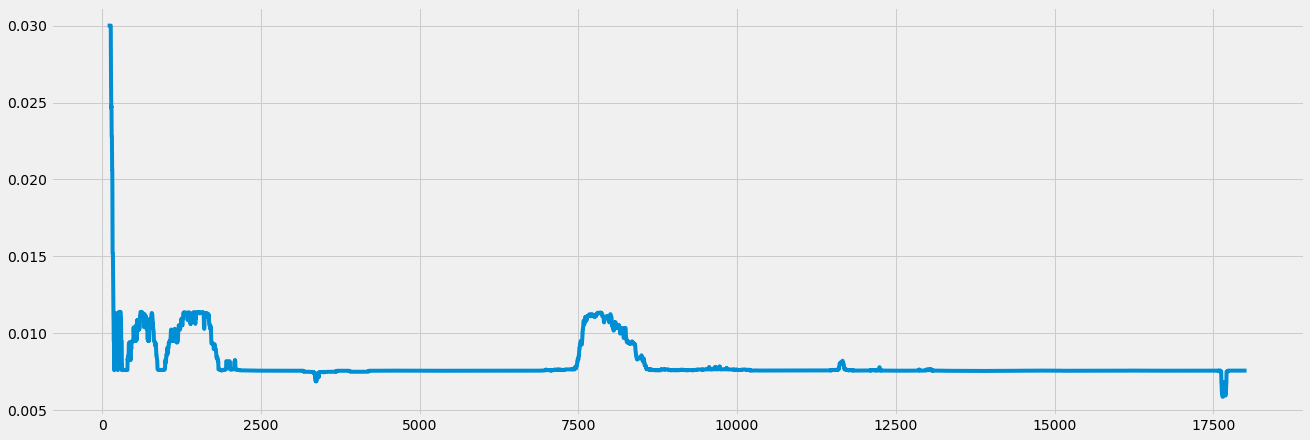

In [28]:
n = 2

bds[n]['ticks_df'].price_median_diff_median.plot()

<AxesSubplot:>

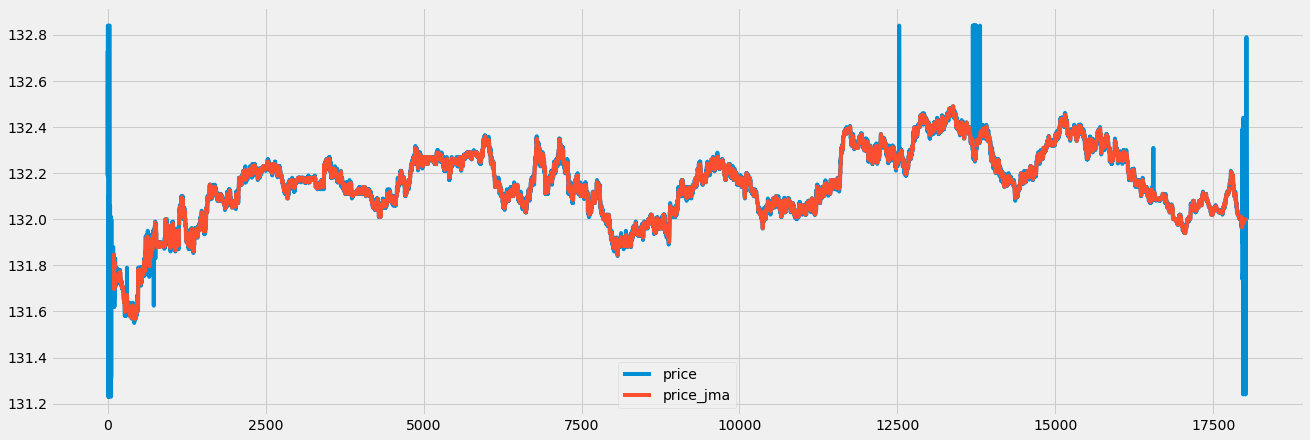

In [29]:
bds[n]['ticks_df'][['price', 'price_jma']].plot()

<AxesSubplot:xlabel='nyc_dt'>

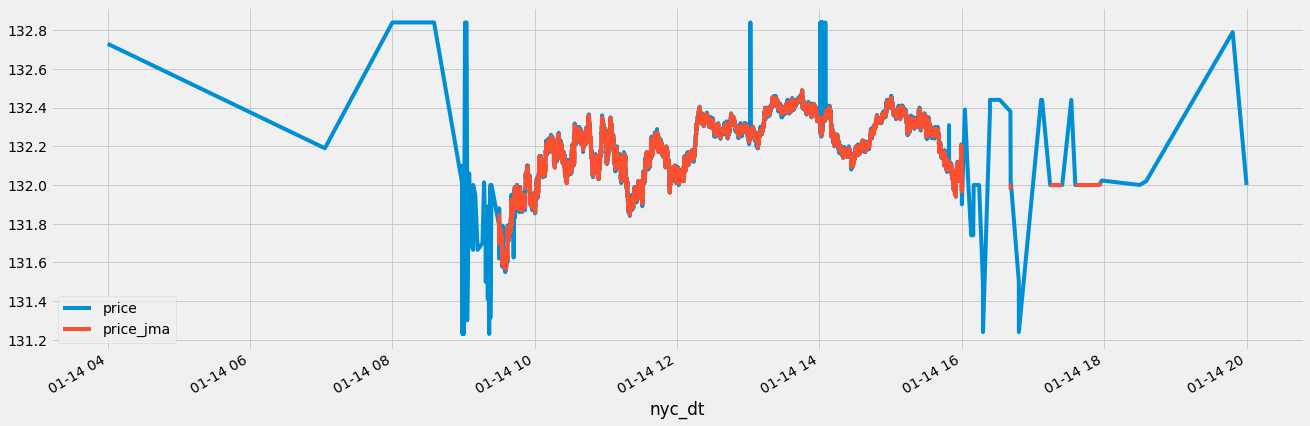

In [30]:
bds[n]['ticks_df'].set_index('nyc_dt')[['price', 'price_jma']].plot()
# bds[n]['ticks_df'].set_index('nyc_dt')[['price', 'price_jma']].plot_bokeh(sizing_mode="scale_height")

<AxesSubplot:xlabel='close_at'>

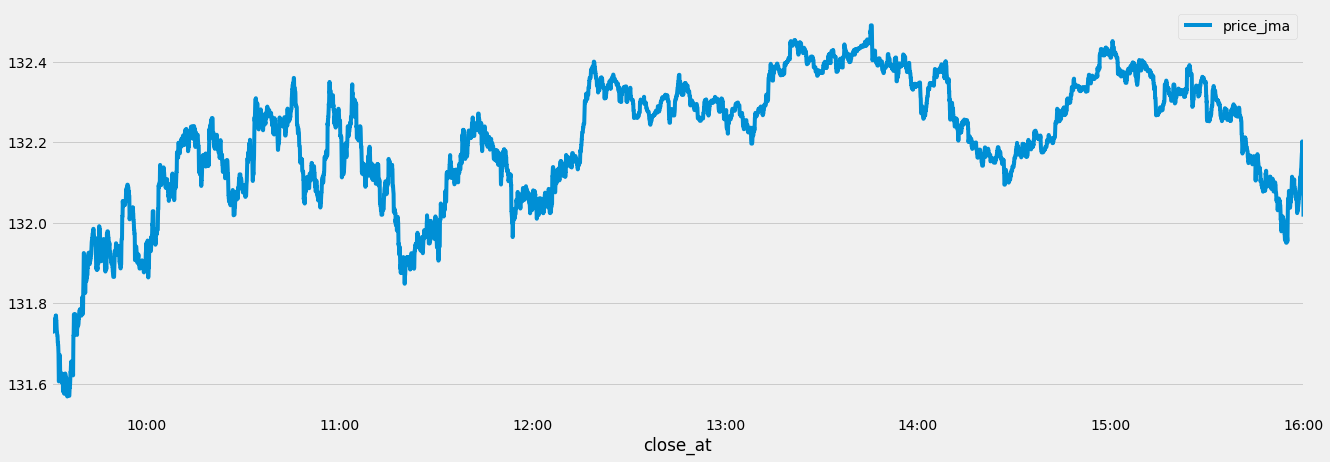

In [31]:
bds[n]['batches_df'].set_index('close_at')[['price_jma']].ffill().plot()

<AxesSubplot:>

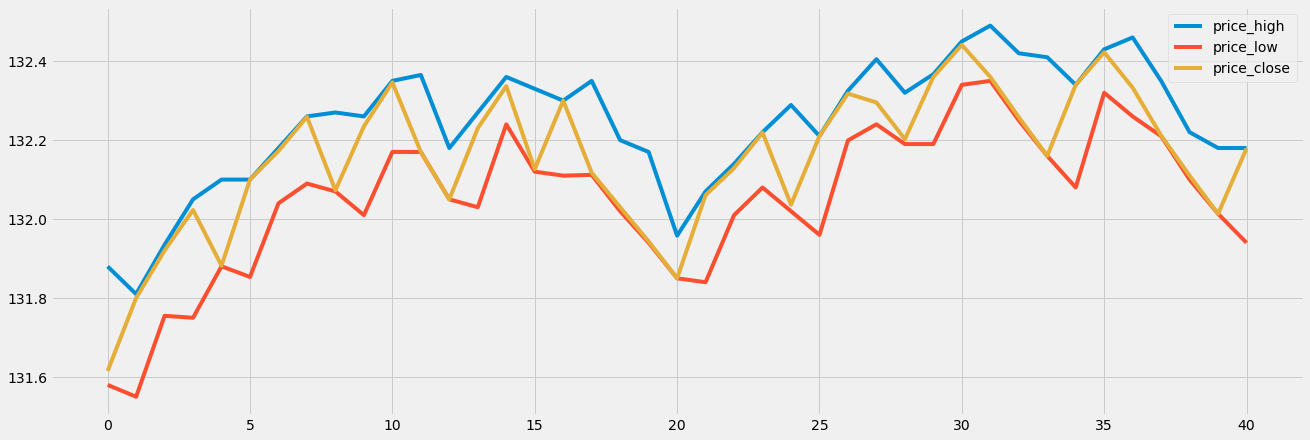

In [32]:
# bds[n]['bars_df'].set_index('close_at')[['price_vwap']].plot()

bds[n]['bars_df'][['price_high', 'price_low', 'price_close']].plot()

# opening_bars_df = bds[n]['bars_df'][bds[n]['bars_df'].open_at.dt.time <= dt.time(hour=9, minute=35)]

# bars_df = bds[n]['bars_df'][bds[n]['bars_df'].open_at.dt.time >  dt.time(hour=9, minute=35)]

# bars_df[['price_high', 'price_low', 'price_close']].plot()

In [33]:
t=bds[n]['bars_df'].copy()
t.label_rrr.value_counts()/t.shape[0]

0.000000    0.365854
2.500000    0.097561
-3.000000   0.073171
-2.000000   0.048780
-5.500000   0.048780
2.000000    0.048780
3.500000    0.048780
-2.500000   0.048780
4.500000    0.024390
3.000000    0.024390
4.000000    0.024390
-3.500000   0.024390
5.000000    0.024390
5.500000    0.024390
-5.000000   0.024390
6.000000    0.024390
-4.500000   0.024390
Name: label_rrr, dtype: float64

In [17]:
# fill daily gaps
stacked_df = stacked.fill_gaps_dates(bds, fill_col='price_vwap')

# stacked stats
stats_df = stacked.stacked_df_stats(stacked_df)

stats_df

,date,bar_count,duration_min_median,price_range_mean,first_bar_open,last_bar_close
0,2019-01-10,49,5.566667,0.209842,2019-01-10 09:30:06-05:00,2019-01-10 15:41:16-05:00
1,2019-01-11,34,8.850000,0.204352,2019-01-11 09:30:14-05:00,2019-01-11 15:46:14-05:00
2,2019-01-14,41,6.566667,0.190479,2019-01-14 09:30:02-05:00,2019-01-14 15:59:30-05:00
3,2019-01-15,63,3.700000,0.183872,2019-01-15 09:30:26-05:00,2019-01-15 15:58:16-05:00
4,2019-01-16,58,2.883333,0.142309,2019-01-16 09:30:02-05:00,2019-01-16 15:58:56-05:00
5,2019-01-17,83,2.266667,0.151742,2019-01-17 09:30:02-05:00,2019-01-17 16:00:00-05:00
6,2019-01-18,67,4.500000,0.160539,2019-01-18 09:30:02-05:00,2019-01-18 15:59:46-05:00


In [18]:
stats_df.describe()

,bar_count,duration_min_median,price_range_mean
count,7.000000,7.000000,7.000000
mean,56.428571,4.904762,0.177591
std,16.631868,2.288593,0.026349
min,34.000000,2.266667,0.142309
25%,45.000000,3.291667,0.156141
50%,58.000000,4.500000,0.183872
75%,65.000000,6.066667,0.197416
max,83.000000,8.850000,0.209842


In [19]:
stacked_df[['price_high','price_low','price_close', 'price_vwap']].plot_bokeh(sizing_mode="scale_height")

Figure(id='1002', ...)

In [34]:
results = []

for date in bds:
    out = (date['ticks_df'].status.value_counts() / date['ticks_df'].shape[0]).to_dict()
    out.update({'date': date['date']})
    results.append(out)

pd.DataFrame(results)

,clean,filtered: MAD warm-up,filtered: irregular conditions,filtered: MAD outlier,filtered: ts diff,filtered: zero volume,date
0,0.989198,0.004136,0.003148,0.001975,0.001358,0.000185,2019-01-10
1,0.989701,0.003151,0.003762,0.002257,0.000988,0.000141,2019-01-11
2,0.988406,0.003717,0.004771,0.001664,0.001276,0.000166,2019-01-14
3,0.986397,0.003048,0.001319,0.007780,0.001319,0.000136,2019-01-15
4,0.982846,0.003580,0.005932,0.006252,0.001229,0.000160,2019-01-16
5,0.989015,0.003361,0.003962,0.002859,0.000752,0.000050,2019-01-17
6,0.984905,0.002443,0.004704,0.006855,0.000984,0.000109,2019-01-18
